# Compass Re-Analysis

This notebook walks through use of my code to analyze the ProPublica analysis of COMPAS recidivism risk scores.<br>
-Eric Saund<br>
 February, 2020

In [1]:
import compasAnalysis as ca

setting model type to: linr


c:\python36x64\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\python36x64\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


The ProPublic analysis document explains that they reduce the raw data down to two data sets, one of size 7,214, and one of 6,172.  All of the models and plots of this analysis return equivalent results regardless of data set.

Get the full 7,214 data set from the file, 'compas-scores-two-years.csv'.<br>The apply filters to get down to the 6,172 data set.

In [2]:
ddict_list = ca.loadDataReturnDict()

loading data from: compas-analysis-master\compas-scores-two-years.csv


In [3]:
len(ddict_list)

7214

In [4]:
ddict_list2 = ca.applyFilters(ddict_list)

In [5]:
len(ddict_list2)

6172

In [6]:
ca.computeChargeDescMap(ddict_list)

setting gl_charge_index_desc_map


In [7]:
ca.computeAgeFeatureMap()

Plot COMPAS predictions for the 6,172 data set as a stacked bar graph. Overplot recid_ratio.

0 ratio: 0.21539657853810265
1 ratio: 0.32116788321167883
2 ratio: 0.37712519319938176
3 ratio: 0.4369369369369369
4 ratio: 0.48109965635738833
5 ratio: 0.5822306238185255
6 ratio: 0.6008064516129032
7 ratio: 0.719047619047619
8 ratio: 0.7142857142857143
9 ratio: 0.805921052631579


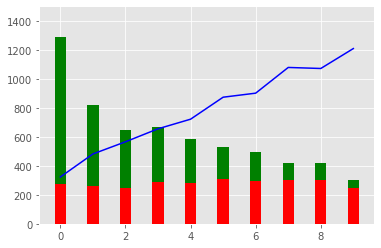

In [8]:
ca.plotRecidByDecile(ddict_list2, 'blue', 'both', 1500)

Print the confusion matrix for the 6,172 data set.
(This printout is not included in the paper)

In [9]:
ca.buildConfusionMatrix(ddict_list2)

count: 6172
[2345, 1018]
[1076, 1733]
FPR: 0.30270591733571217
FNR: 0.38305446778212887
TNR: 0.6972940826642878
TPR = recall: 0.6169455322178711
PPV = precision: 0.6299527444565612
f1: 0.6233812949640288
recidivism ratio: 0.4551198963058976


[[2345, 1018], [1076, 1733]]

Print the confusion matrix for all 7,214 records. (This confusion matrix is included in the slide deck but not in the paper)

In [10]:
ca.buildConfusionMatrix(ddict_list)

count: 7214
[2681, 1282]
[1216, 2035]
FPR: 0.32349230381024474
FNR: 0.3740387573054445
TNR: 0.6765076961897553
TPR = recall: 0.6259612426945556
PPV = precision: 0.6135061802833887
f1: 0.6196711327649209
recidivism ratio: 0.45065151095092876


[[2681, 1282], [1216, 2035]]

Show the ROC Curve for the COMPAS predictions.

In [11]:
roc = ca.buildROCCurve(ddict_list)

AUC:0.7021662544019724


ProPublica reports COMPAS predictive accuracy of decile scores as .66 using a different method with a different data file called cox-parsed.csv.  I cannot explain why they arrive at a different result.  For some reason they chose not to compute AUC directly from the decile scores and recidivism values drawn from the files they use to report the confusion matrix.

AUC: 0.7021662544019724


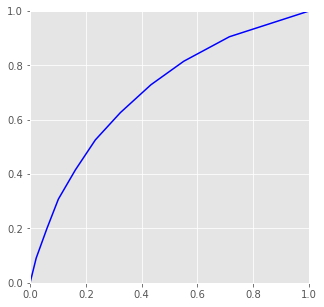

In [12]:
ca.plotROC(roc)

Isolate African-American and Caucasian data records (both data sets).

In [13]:
ddict_list_aa = ca.filterDdict(ddict_list, [('race', '==', 'African-American')])

In [14]:
ddict_list_cau = ca.filterDdict(ddict_list, [('race', '==', 'Caucasian')])

In [15]:
ddict_list2_aa = ca.filterDdict(ddict_list2, [('race', '==', 'African-American')])

In [16]:
ddict_list2_cau = ca.filterDdict(ddict_list2, [('race', '==', 'Caucasian')])

Plot COMPAS predictions for African-American and Caucasian data records as stacked bar graphs.<br>Overplot recid_ratios.

0 ratio: 0.228643216080402
1 ratio: 0.30279898218829515
2 ratio: 0.4190751445086705
3 ratio: 0.4597402597402597
4 ratio: 0.4821917808219178
5 ratio: 0.5598958333333334
6 ratio: 0.5925
7 ratio: 0.6824512534818942
8 ratio: 0.7078947368421052
9 ratio: 0.7937062937062938


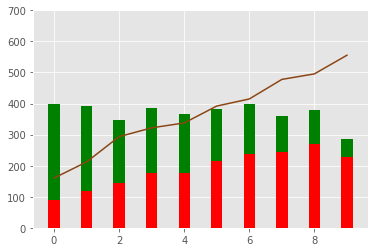

In [17]:
ca.plotRecidByDecile(ddict_list_aa, 'saddlebrown', 'both', 700)

0 ratio: 0.20851688693098386
1 ratio: 0.31301939058171746
2 ratio: 0.34065934065934067
3 ratio: 0.39649122807017545
4 ratio: 0.4605809128630705
5 ratio: 0.5721649484536082
6 ratio: 0.6153846153846154
7 ratio: 0.7192982456140351
8 ratio: 0.6938775510204082
9 ratio: 0.703125


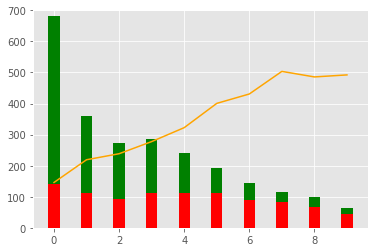

In [18]:
ca.plotRecidByDecile(ddict_list_cau, 'orange', 'both', 700)

Print confusion matrices for African-American and Caucasian data records.

In [19]:
ca.buildConfusionMatrix(ddict_list_aa)

count: 3696
[990, 805]
[532, 1369]
FPR: 0.44846796657381616
FNR: 0.27985270910047344
TNR: 0.5515320334261838
TPR = recall: 0.7201472908995266
PPV = precision: 0.6297148114075437
f1: 0.6719018404907975
recidivism ratio: 0.5143398268398268


[[990, 805], [532, 1369]]

In [20]:
ca.buildConfusionMatrix(ddict_list_cau)

count: 2454
[1139, 349]
[461, 505]
FPR: 0.23454301075268819
FNR: 0.4772256728778468
TNR: 0.7654569892473119
TPR = recall: 0.5227743271221532
PPV = precision: 0.5913348946135831
f1: 0.5549450549450549
recidivism ratio: 0.39364303178484106


[[1139, 349], [461, 505]]

Use the arguments to plotRecidByDecile to get just the recid ratios.<br>Use your favorite image editor to overlay the plots. I used ScanScribe, of course.

0 ratio: 0.228643216080402
1 ratio: 0.30279898218829515
2 ratio: 0.4190751445086705
3 ratio: 0.4597402597402597
4 ratio: 0.4821917808219178
5 ratio: 0.5598958333333334
6 ratio: 0.5925
7 ratio: 0.6824512534818942
8 ratio: 0.7078947368421052
9 ratio: 0.7937062937062938


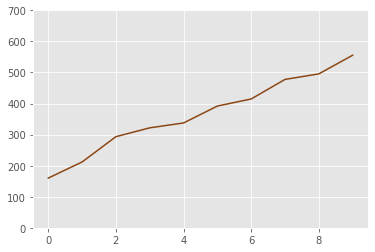

In [21]:
ca.plotRecidByDecile(ddict_list_aa, 'saddlebrown', 'ratio', 700)

0 ratio: 0.20851688693098386
1 ratio: 0.31301939058171746
2 ratio: 0.34065934065934067
3 ratio: 0.39649122807017545
4 ratio: 0.4605809128630705
5 ratio: 0.5721649484536082
6 ratio: 0.6153846153846154
7 ratio: 0.7192982456140351
8 ratio: 0.6938775510204082
9 ratio: 0.703125


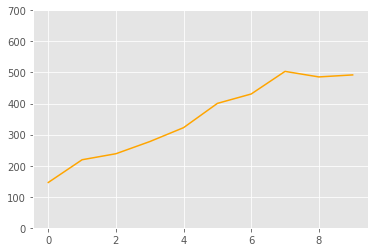

In [22]:
ca.plotRecidByDecile(ddict_list_cau, 'orange', 'ratio', 700)

# Insight From Imaginary Data

We gain insight into how distributions of scores leads to the properties of confusion matrices by examining synthetic data.<br>
The race argument is never actually used but is included as a marker for the characteristics of the population being synthesized.  These are typically designed to be idealized versions of the crufty real data.<br>Generate and plot synthetic data uniformly distributed over decile, with target recid.

In [23]:
ddict_uniform_aa = ca.generateUniformDecileSamples(1000, 'African-American', .51)

In [24]:
ddict_uniform_cau = ca.generateUniformDecileSamples(1000, 'Caucasian', .39)

0 ratio: 0.51
1 ratio: 0.51
2 ratio: 0.51
3 ratio: 0.51
4 ratio: 0.51
5 ratio: 0.51
6 ratio: 0.51
7 ratio: 0.51
8 ratio: 0.51
9 ratio: 0.51


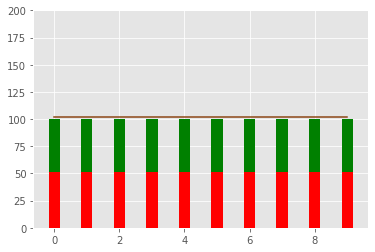

In [25]:
ca.plotRecidByDecile(ddict_uniform_aa, 'saddlebrown', 'both', 200)

0 ratio: 0.39
1 ratio: 0.39
2 ratio: 0.39
3 ratio: 0.39
4 ratio: 0.39
5 ratio: 0.39
6 ratio: 0.39
7 ratio: 0.39
8 ratio: 0.39
9 ratio: 0.39


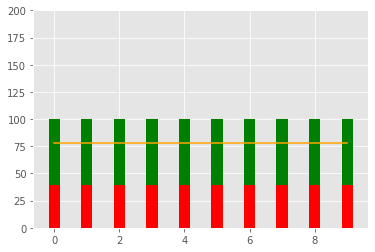

In [26]:
ca.plotRecidByDecile(ddict_uniform_cau, 'orange', 'both', 200)

Generate and plot synthetic data with consistent prediction quality and the same overall recid rate for imaginary 'Synthesized African-American' and 'Synthesized Caucasian' populations of size 1000 each.  The recid rate per decile is the same, reflecting consistent prediction quality of the imaginary prediction algorithm for these data sets. The AA population is uniformly distributed across deciles.

In [27]:
ddict_unilinear_aa = ca.generateUniformDecileSamplesLinearPrediction(1000, 'African-American', .5, .2)

0 ratio: 0.2
1 ratio: 0.27
2 ratio: 0.33
3 ratio: 0.4
4 ratio: 0.47
5 ratio: 0.53
6 ratio: 0.6
7 ratio: 0.67
8 ratio: 0.73
9 ratio: 0.8


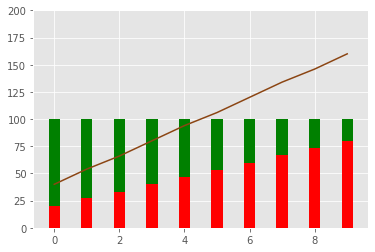

In [28]:
ca.plotRecidByDecile(ddict_unilinear_aa, 'saddlebrown', 'both', 200)

In [29]:
ca.buildConfusionMatrix(ddict_unilinear_aa)

count: 1000
[280, 220]
[120, 380]
FPR: 0.44
FNR: 0.24
TNR: 0.56
TPR = recall: 0.76
PPV = precision: 0.6333333333333333
f1: 0.6909090909090909
recidivism ratio: 0.5


[[280, 220], [120, 380]]

The Cau population declines per decile.  In order for recid ratio to be consistent, the recidivising counts arc downward.

In [30]:
ddict_decl_cau = ca.generateDecliningDecileSamplesLinearPrediction(1000, 'Caucasian', .5, .2, 1.9)

0 ratio: 0.2
1 ratio: 0.2647058823529412
2 ratio: 0.3333333333333333
3 ratio: 0.4
4 ratio: 0.4636363636363636
5 ratio: 0.5333333333333333
6 ratio: 0.6
7 ratio: 0.66
8 ratio: 0.7333333333333333
9 ratio: 0.8


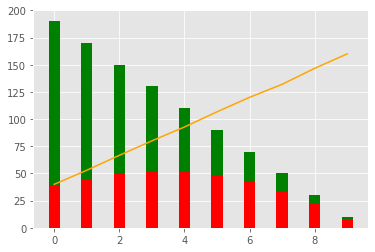

In [31]:
ca.plotRecidByDecile(ddict_decl_cau, 'orange', 'both', 200)

In [32]:
ca.buildConfusionMatrix(ddict_decl_cau)

count: 1000
[455, 156]
[185, 204]
FPR: 0.2553191489361702
FNR: 0.4755784061696658
TNR: 0.7446808510638298
TPR = recall: 0.5244215938303342
PPV = precision: 0.5666666666666667
f1: 0.5447263017356474
recidivism ratio: 0.389


[[455, 156], [185, 204]]

# Independent Predictive Algorithms

Train and test a linear model for the 6,172 data set.  Similar results obtain for the 7,214 data set.<br>
Results are put into global variables in the ca module.

In [33]:
ca.runTrainTestFull(ddict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
AUC: 0.7455968332534566
choosing score_threshold: 0.504 for optimal mcc score: 0.37554379885141076
count: 6172
[2601, 762]
[1132, 1677]
FPR: 0.22658340767172166
FNR: 0.40299038803844783
TNR: 0.7734165923282783
TPR = recall: 0.5970096119615521
PPV = precision: 0.6875768757687577
f1: 0.6391006097560975
mcc: 0.37731677138764597
recidivism ratio: 0.4551198963058976


Plot prediction score distribution as stacked bars as with the COMPAS model.<br>This is not as informative as the line plot below.

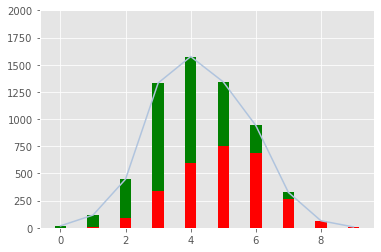

In [34]:
ca.plotPredictionScoresAsStackedDecileBars(ca.gl_last_y, ca.gl_last_preds, None, 2000)

Plot prediction score distributions for true recid (red) and true norecid(green) as lines.

[0.0, 0.0, 54.54545454545455, 113.6842105263158, 234.7826086956522, 236.8421052631579, 295.114006514658, 319.3916349809886, 409.09090909090907, 537.2448979591837, 655.8704453441296, 800.6688963210702, 853.7960954446855, 927.2727272727273, 996.6101694915254, 1040.8163265306123, 1090.9090909090908, 1200.0, 1200.0, 1200.0]


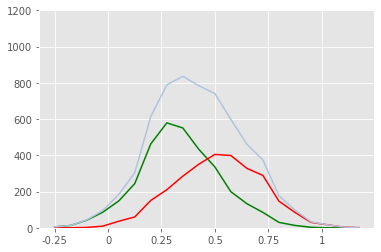

In [35]:
ca.plotPredictionScores(ca.gl_last_y, ca.gl_last_preds, None, 1200)

Plot the ROC Curve (Receiver Operating Characteristic) to see the True Positive Rate/False Positive Rate tradeoff.

AUC: 0.7455968332534566


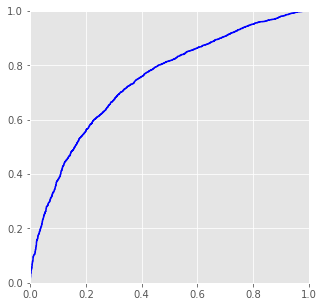

In [36]:
ca.plotROC(ca.gl_last_roc)

Plot and print confusion matrices for the linear model, broken out by African-American and Caucasian subpopulations.<br>Choose the threshold of .504 because that's what was chosen by mcc for the model trained on all data.

In [37]:
ca.runRaceComparisonForModel(ddict_list2, ca.gl_last_model, .504)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']

Caucasian
AUC: 0.7274027476253161
count: 2103
[1050, 231]
[424, 398]
FPR: 0.18032786885245902
FNR: 0.5158150851581509
TNR: 0.819672131147541
TPR = recall: 0.48418491484184917
PPV = precision: 0.6327503974562798
f1: 0.5485871812543074
mcc: 0.3238215301321693
recidivism ratio: 0.3908701854493581

African-American
AUC: 0.7417329885945116
count: 3175
[1070, 444]
[535, 1126]
FPR: 0.29326287978863935
FNR: 0.3220951234196267
TNR: 0.7067371202113606
TPR = recall: 0.6779048765803732
PPV = precision: 0.7171974522292993
f1: 0.6969978334880842
mcc: 0.3842528610028088
recidivism ratio: 0.5231496062992126


Plot the distributions for African-American and Caucasian subpopulations.

[0.0, 0.0, 0.0, 38.888888888888886, 171.11111111111111, 152.47524752475246, 199.49999999999997, 194.66292134831463, 261.2676056338028, 286.51960784313724, 398.3333333333333, 485.7519788918206, 514.7692307692308, 552.34375, 588.0, 611.2676056338028, 666.6666666666666, 700.0, 700.0, 0]


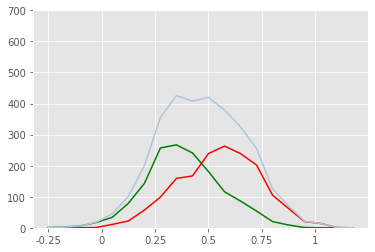

In [38]:
ca.plotPredictionScores(ca.gl_last_y_aa, ca.gl_last_preds_aa, None, ymax = 700)

[0.0, 0.0, 45.16129032258064, 70.0, 129.62962962962962, 120.86330935251799, 188.17204301075267, 187.68115942028987, 212.62798634812287, 341.86046511627904, 360.69868995633186, 420.88607594936707, 464.3564356435644, 532.9545454545455, 560.0, 595.0, 544.4444444444445, 700.0, 700.0, 700.0]


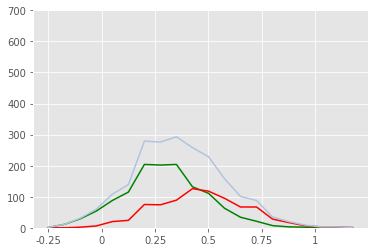

In [39]:
ca.plotPredictionScores(ca.gl_last_y_cau, ca.gl_last_preds_cau, None, ymax = 700)

Overplot the recid ratios with the distributions.  The ratio lines are not perfectly straight, but are pretty much in agreement between the AA and Cau subpopulations.

[0.0, 0.0, 0.0, 38.888888888888886, 171.11111111111111, 152.47524752475246, 199.49999999999997, 194.66292134831463, 261.2676056338028, 286.51960784313724, 398.3333333333333, 485.7519788918206, 514.7692307692308, 552.34375, 588.0, 611.2676056338028, 666.6666666666666, 700.0, 700.0, 0]


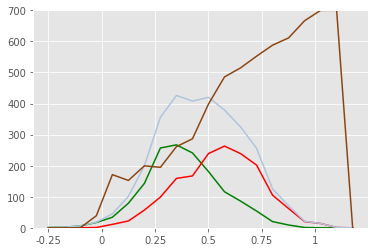

In [40]:
ca.plotPredictionScores(ca.gl_last_y_aa, ca.gl_last_preds_aa, ratio_color='saddlebrown', ymax = 700)

[0.0, 0.0, 45.16129032258064, 70.0, 129.62962962962962, 120.86330935251799, 188.17204301075267, 187.68115942028987, 212.62798634812287, 341.86046511627904, 360.69868995633186, 420.88607594936707, 464.3564356435644, 532.9545454545455, 560.0, 595.0, 544.4444444444445, 700.0, 700.0, 700.0]


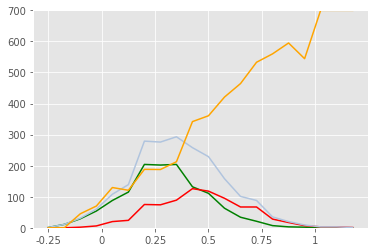

In [41]:
ca.plotPredictionScores(ca.gl_last_y_cau, ca.gl_last_preds_cau, ratio_color='orange', ymax = 700)

# More experiments

The code affords much more probing and experimentation.<br>Train a linear model using a feature set that includes race as a feature.

In [42]:
ca.runTrainTestFull(ddict_list2, ca.gl_features_race)

feature_list: ['race', 'age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
AUC: 0.7462291197519665
choosing score_threshold: 0.521 for optimal mcc score: 0.37392260183334136
count: 6172
[2665, 698]
[1202, 1607]
FPR: 0.20755278025572405
FNR: 0.4279102883588466
TNR: 0.7924472197442759
TPR = recall: 0.5720897116411534
PPV = precision: 0.6971800433839479
f1: 0.6284708642940946
mcc: 0.3752824764330362
recidivism ratio: 0.4551198963058976


Compare the discrepancy of False Positive and False Negative errors of this model between African-American and Caucasian populations with the model (above) that excludes race as a feature.<br>The optimal MCC threshold is .521

In [43]:
ca.runRaceComparisonForModel(ddict_list2, ca.gl_last_model, .521, ca.gl_features_race)

feature_list: ['race', 'age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']

Caucasian
AUC: 0.7252156257181981
count: 2103
[1071, 210]
[454, 368]
FPR: 0.16393442622950818
FNR: 0.5523114355231143
TNR: 0.8360655737704918
TPR = recall: 0.44768856447688565
PPV = precision: 0.6366782006920415
f1: 0.5257142857142858
mcc: 0.3101371820821578
recidivism ratio: 0.3908701854493581

African-American
AUC: 0.7428659025892793
count: 3175
[1090, 424]
[546, 1115]
FPR: 0.2800528401585205
FNR: 0.32871763997591813
TNR: 0.7199471598414795
TPR = recall: 0.6712823600240819
PPV = precision: 0.7244964262508122
f1: 0.696875
mcc: 0.39099248560428135
recidivism ratio: 0.5231496062992126


Test the race-sensitive model with race='African-American' and race='Caucasian' feature values reversed for each other.

In [44]:
ca.runRaceComparisonForModel_InvertRace(ddict_list2, ca.gl_last_model, .541, ca.gl_features_race)

feature_list: ['race', 'age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']

Caucasian
AUC: 0.7252327200275025
count: 2103
[1068, 213]
[452, 370]
FPR: 0.16627634660421545
FNR: 0.5498783454987834
TNR: 0.8337236533957846
TPR = recall: 0.45012165450121655
PPV = precision: 0.6346483704974271
f1: 0.5266903914590747
mcc: 0.30941126530500296
recidivism ratio: 0.3908701854493581

African-American
AUC: 0.7428523823801453
count: 3175
[1180, 334]
[685, 976]
FPR: 0.22060766182298547
FNR: 0.4124021673690548
TNR: 0.7793923381770145
TPR = recall: 0.5875978326309452
PPV = precision: 0.7450381679389313
f1: 0.6570178391114103
mcc: 0.37232921997525337
recidivism ratio: 0.5231496062992126


The discrepacy is reduced somewhat, which reflects the fact that race is of some predictive value in predicting recidivism.  But the direction of significant discrepancy in False Positive and False Negative errors between the two populations remains the same.  Even if race is included as a feature, the prediction distributions and confusion matrices are dominated by the race-neutral features, age, priors counts, and charge description.

Use a Gradient Boosting Regressor model instead of a linear model.

In [45]:
ca.setModelType('gbr')

setting model type to: gbr


Because a GBR has many more parameters than a linear model, it is subject to overfitting the training data. It is most appropriate to use K-Fold cross validation, meaning we divide the data set into random slices.  Train on 4/5 of the data, and test on the other 1/5 slices.

In [46]:
ca.runTrainTestKFold(ddict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
AUC: 0.7361214278009327
choosing score_threshold: 0.42400000000000004 for optimal mcc score: 0.3684662045847497
count: 6172
[2227, 1136]
[821, 1988]
FPR: 0.3377936366339578
FNR: 0.2922748309006764
TNR: 0.6622063633660422
TPR = recall: 0.7077251690993236
PPV = precision: 0.6363636363636364
f1: 0.6701500084274397
mcc: 0.3684662045847497
recidivism ratio: 0.4551198963058976


AUC is .73, compared to .75 when training a GBR model on the full data set:

In [47]:
ca.runTrainTestFull(ddict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
AUC: 0.7508867413236824
choosing score_threshold: 0.41300000000000003 for optimal mcc score: 0.3880973124705922
count: 6172
[2208, 1155]
[749, 2060]
FPR: 0.3434433541480821
FNR: 0.2666429334282663
TNR: 0.656556645851918
TPR = recall: 0.7333570665717337
PPV = precision: 0.640746500777605
f1: 0.6839309428950863
mcc: 0.38867952294900193
recidivism ratio: 0.4551198963058976


These are pretty close, which means the overfitting is not too too bad with the default parameters I chose by experimentation.

# Violent Recidivism

Test violent recidivism instead of general recidivism.

In [48]:
ca.setRecidType('v_recid', ddict_list)

setting gl_charge_index_desc_map


Load the violent recidivism data set, 'compas-scores-two-years-violent.csv'

In [49]:
vdict_list = ca.loadDataReturnDict('violent')

loading data from: compas-analysis-master\compas-scores-two-years-violent.csv


In [50]:
vdict_list2 = ca.applyFilters(vdict_list, 'violent')

Adjust features for violent recidivism.

In [51]:
ca.computeChargeDescMap(vdict_list)

setting gl_charge_index_desc_map


In [52]:
ca.computeAgeFeatureMap()

In [53]:
vdict_list2_aa = ca.filterDdict(vdict_list2, [('race', '==', 'African-American')])

In [54]:
vdict_list2_cau = ca.filterDdict(vdict_list2, [('race', '==', 'Caucasian')])

0 ratio: 0.06791044776119402
1 ratio: 0.09646302250803858
2 ratio: 0.18047882136279927
3 ratio: 0.18872549019607843
4 ratio: 0.20615384615384616
5 ratio: 0.3
6 ratio: 0.33004926108374383
7 ratio: 0.45081967213114754
8 ratio: 0.5727272727272728
9 ratio: 0.5106382978723404


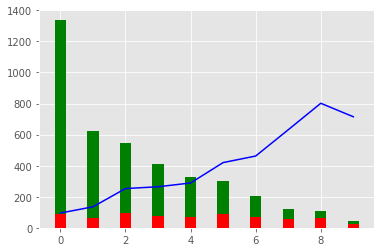

In [55]:
ca.plotRecidByDecile(vdict_list2, 'blue', 'both', 1400)

In [56]:
vroc = ca.buildROCCurve(vdict_list2)

AUC:0.7185307185137839


COMPAS gets an AUC on violent recidivism of .72, which is better than reported by ProPublica.

AUC: 0.7185307185137839


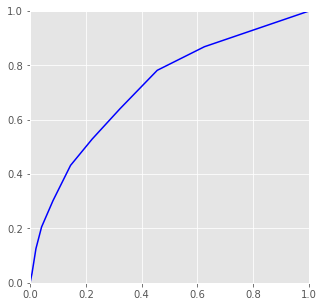

In [57]:
ca.plotROC(vroc)

Print confusion matrices for African-American and Caucasian data records.

In [58]:
ca.buildConfusionMatrix(ddict_list_aa)

count: 3696
[1853, 1348]
[187, 308]
FPR: 0.4211184004998438
FNR: 0.37777777777777777
TNR: 0.5788815995001562
TPR = recall: 0.6222222222222222
PPV = precision: 0.1859903381642512
f1: 0.28637842863784285
recidivism ratio: 0.13392857142857142


[[1853, 1348], [187, 308]]

In [59]:
ca.buildConfusionMatrix(ddict_list_cau)

count: 2454
[1772, 460]
[139, 83]
FPR: 0.2060931899641577
FNR: 0.6261261261261262
TNR: 0.7939068100358423
TPR = recall: 0.3738738738738739
PPV = precision: 0.15285451197053407
f1: 0.2169934640522876
recidivism ratio: 0.09046454767726161


[[1772, 460], [139, 83]]

As with all recidivism, the False Positive and False Negative rates are different for AA and Cau populations.

Build our own model for violent recidivism that omits race and sex features with certainty.<br>Go back to a linear model.

In [60]:
ca.setModelType('linr')

setting model type to: linr


In [61]:
ca.runTrainTestKFold(vdict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
AUC: 0.7326954340818088
choosing score_threshold: 0.3 for optimal mcc score: 0.29646649203421127
count: 4020
[2949, 379]
[412, 280]
FPR: 0.11388221153846154
FNR: 0.5953757225433526
TNR: 0.8861177884615384
TPR = recall: 0.4046242774566474
PPV = precision: 0.424886191198786
f1: 0.41450777202072536
mcc: 0.29646649203421127
recidivism ratio: 0.17213930348258707


The overall violent recidivism ratio is 0.11.<br>Compare 5-fold cross-validation with a full data linear model, to check for overfitting.

In [62]:
ca.runTrainTestFull(vdict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
AUC: 0.7575823629946626
choosing score_threshold: 0.289 for optimal mcc score: 0.3325875121963907
count: 4020
[2963, 365]
[388, 304]
FPR: 0.10967548076923077
FNR: 0.5606936416184971
TNR: 0.8903245192307693
TPR = recall: 0.4393063583815029
PPV = precision: 0.45440956651718983
f1: 0.446730345334313
mcc: 0.3340968030816868
recidivism ratio: 0.17213930348258707


Overfitting is possible because there are more charge descriptions with only a handful of incidents, which even a linear model can overfit with the 73 one-hot c_charge_desc features. So, it is more correct to use the 5-fold model to predict violent recidivism.

In [64]:
ca.runTrainTestKFold(vdict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
AUC: 0.7224808248110258
choosing score_threshold: 0.33 for optimal mcc score: 0.28969192568037905
count: 4020
[3033, 295]
[450, 242]
FPR: 0.08864182692307693
FNR: 0.6502890173410405
TNR: 0.9113581730769231
TPR = recall: 0.34971098265895956
PPV = precision: 0.4506517690875233
f1: 0.3938161106590724
mcc: 0.28969192568037905
recidivism ratio: 0.17213930348258707


AUC is .72, which is "not bad".

There is a lot of overlap in the recid and norecid distributions.  But the bulk of the no recidivism records get lower prediction scores.

[0.0, 22.22222222222222, 34.013605442176875, 68.02721088435375, 88.26815642458101, 137.5, 185.58282208588957, 279.3427230046948, 452.8301886792453, 386.5546218487395, 583.3333333333334, 612.9032258064516, 277.77777777777777, 636.3636363636364, 1000.0, 1000.0, 1000.0, 0, 0, 0]


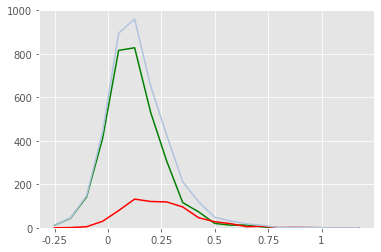

In [68]:
ca.plotPredictionScores(ca.gl_last_y, ca.gl_last_preds, ratio_color=None, ymax = 1000)

The ROC curve looks a bit flatter as well.  But at least it is better than being on the diagonal with an AUC of 0.5.

AUC: 0.7224808248110258


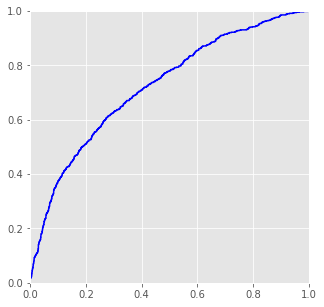

In [66]:
ca.plotROC(ca.gl_last_roc)

Print confusion matrices for the linear model for violent recidivism, broken out by African-American and Caucasian subpopulations.<br>
Choose the threshold of .33 because that's what was chosen by mcc for the model trained on all data.<br>
(Actually, the threshold could be slightly higher or lower when run repeatedly due to k-fold randomization.)

In [72]:
ca.runRaceComparisonForModel(vdict_list2, ca.gl_last_model, .33)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']

Caucasian
AUC: 0.7156661514160937
count: 1459
[1195, 78]
[133, 53]
FPR: 0.061272584446190104
FNR: 0.7150537634408602
TNR: 0.9387274155538099
TPR = recall: 0.2849462365591398
PPV = precision: 0.40458015267175573
f1: 0.33438485804416407
mcc: 0.2609461042403786
recidivism ratio: 0.12748457847840988

African-American
AUC: 0.7467085803471415
count: 1918
[1336, 156]
[252, 174]
FPR: 0.10455764075067024
FNR: 0.5915492957746479
TNR: 0.8954423592493298
TPR = recall: 0.4084507042253521
PPV = precision: 0.5272727272727272
f1: 0.46031746031746035
mcc: 0.3346784733914066
recidivism ratio: 0.22210636079249219


Plot violent recidivism prediction scores for a linear model for African-American and Caucasian subsets of the violent recidivism data.

[0, 0.0, 14.285714285714285, 26.515151515151516, 51.28205128205128, 66.11570247933885, 119.65811965811966, 156.86274509803923, 274.43609022556393, 300.0, 283.3333333333333, 218.75, 291.6666666666667, 500.0, 500.0, 0, 0, 0, 0, 0]


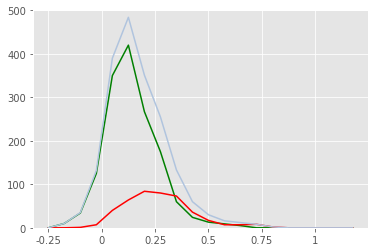

In [74]:
ca.plotPredictionScores(ca.gl_last_y_aa, ca.gl_last_preds_aa, None, ymax = 500)

[0.0, 0.0, 13.157894736842104, 28.57142857142857, 36.13053613053613, 63.09148264984227, 74.07407407407408, 147.61904761904762, 163.26530612244898, 232.14285714285714, 200.0, 277.77777777777777, 333.3333333333333, 0, 0, 0, 0, 0, 0, 0]


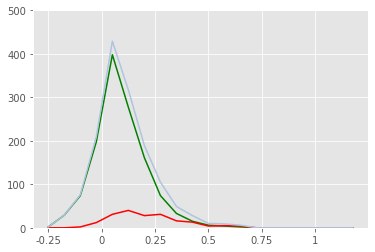

In [75]:
ca.plotPredictionScores(ca.gl_last_y_cau, ca.gl_last_preds_cau, None, ymax = 500)

Try a Gradient Boosting Regressor model to predict violent recidivism.

In [70]:
ca.setModelType('gbr')

setting model type to: gbr


A 5-fold CV model does maybe a tad better, with AUC=.74:

In [71]:
ca.runTrainTestKFold(vdict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
AUC: 0.7426251945308924
choosing score_threshold: 0.24300000000000002 for optimal mcc score: 0.31036083827234734
count: 4020
[2774, 554]
[339, 353]
FPR: 0.16646634615384615
FNR: 0.48988439306358383
TNR: 0.8335336538461539
TPR = recall: 0.5101156069364162
PPV = precision: 0.38919514884233736
f1: 0.44152595372107567
mcc: 0.31036083827234734
recidivism ratio: 0.17213930348258707


With cross-validation, we don't get out a single model to compare the distributions and confusion matrices between African-American and Caucasian defendants, so we cannot apply runRaceComparisonForModel() directly. It would be possible to write a function to do so by running the evaluations of the two racial populations on the test slices under each of the K model training splits.  This exercise is left to the reader.
